In [74]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.models import efficientnet_b3, EfficientNet_B3_Weights
from torch.utils.data import DataLoader, random_split
from torch.optim import Adam
from tqdm import tqdm

In [75]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [76]:
# Path to your dataset
data_dir = "/kaggle/input/tanks-classification/tanks_for_deep"  # Change this to match your dataset name

# Load the default transforms for EfficientNet-B3
#weights = EfficientNet_B3_Weights.DEFAULT

transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])



In [77]:
# Load dataset
full_dataset = ImageFolder(root=data_dir, transform=transform)

# Train/Val split
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)

# Get class names
class_names = full_dataset.classes
print(f"Detected classes: {class_names}")


Detected classes: ['Al Mared', 'Al-wahsh', 'Centurion', 'Challenger2', 'China_Type99', 'Leopard 2', 'M1_Abrams', 'M60', 'Magach', 'Merkava IV', 'Russia T-34', 'T90']


In [80]:
import torch
from torchvision.models import efficientnet_b3
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Create model with default weights=None
model = efficientnet_b3(weights=None)

# 2. Replace the final classifier head for 12 classes
# The original head is called "classifier", and the last Linear layer is at index 1
num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, 12)

# 3. Load state_dict from your local path
weights_path = '/kaggle/input/efficientnetb3/pytorch/default/1/efficientnet_b3_rwightman-b3899882.pth'
state_dict = torch.load(weights_path, map_location=device)

# 4. Filter out mismatched keys (final layer)
filtered_state_dict = {k: v for k, v in state_dict.items() if not k.startswith('classifier.1')}

# 5. Load weights into model (strict=False allows partial matching)
model.load_state_dict(filtered_state_dict, strict=False)

# 6. Move model to device
model = model.to(device)

print("✅ Model loaded successfully with custom head.")

✅ Model loaded successfully with custom head.


In [81]:
# import torch
# from torchvision.models import inception_v3

# weights_path = '/kaggle/input/inceptionmodelv3/pytorch/default/1/inception_v3_google-0cc3c7bd.pth'  # Update path if needed
# model = inception_v3(weights=None, aux_logits=True)
# model.load_state_dict(torch.load(weights_path))
# model = model.to(device)


In [82]:
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.0001)
num_epochs = 15


In [83]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {running_loss:.4f} - Train Accuracy: {train_acc:.4f}")
# 

Epoch 1/15: 100%|██████████| 150/150 [00:33<00:00,  4.52it/s]


Epoch [1/15] - Loss: 243.1188 - Train Accuracy: 0.6442


Epoch 2/15: 100%|██████████| 150/150 [00:32<00:00,  4.55it/s]


Epoch [2/15] - Loss: 33.2200 - Train Accuracy: 0.9833


Epoch 3/15: 100%|██████████| 150/150 [00:32<00:00,  4.62it/s]


Epoch [3/15] - Loss: 8.8033 - Train Accuracy: 0.9971


Epoch 4/15: 100%|██████████| 150/150 [00:33<00:00,  4.54it/s]


Epoch [4/15] - Loss: 4.1355 - Train Accuracy: 0.9992


Epoch 5/15: 100%|██████████| 150/150 [00:33<00:00,  4.54it/s]


Epoch [5/15] - Loss: 2.4389 - Train Accuracy: 0.9996


Epoch 6/15: 100%|██████████| 150/150 [00:33<00:00,  4.52it/s]


Epoch [6/15] - Loss: 1.7636 - Train Accuracy: 0.9996


Epoch 7/15: 100%|██████████| 150/150 [00:32<00:00,  4.56it/s]


Epoch [7/15] - Loss: 1.8078 - Train Accuracy: 0.9992


Epoch 8/15: 100%|██████████| 150/150 [00:33<00:00,  4.51it/s]


Epoch [8/15] - Loss: 1.6237 - Train Accuracy: 0.9983


Epoch 9/15: 100%|██████████| 150/150 [00:33<00:00,  4.53it/s]


Epoch [9/15] - Loss: 1.2562 - Train Accuracy: 0.9988


Epoch 10/15: 100%|██████████| 150/150 [00:33<00:00,  4.51it/s]


Epoch [10/15] - Loss: 0.7967 - Train Accuracy: 1.0000


Epoch 11/15: 100%|██████████| 150/150 [00:33<00:00,  4.50it/s]


Epoch [11/15] - Loss: 1.2403 - Train Accuracy: 0.9983


Epoch 12/15: 100%|██████████| 150/150 [00:32<00:00,  4.58it/s]


Epoch [12/15] - Loss: 0.6500 - Train Accuracy: 1.0000


Epoch 13/15: 100%|██████████| 150/150 [00:32<00:00,  4.57it/s]


Epoch [13/15] - Loss: 1.4496 - Train Accuracy: 0.9983


Epoch 14/15: 100%|██████████| 150/150 [00:33<00:00,  4.47it/s]


Epoch [14/15] - Loss: 1.4717 - Train Accuracy: 0.9979


Epoch 15/15: 100%|██████████| 150/150 [00:33<00:00,  4.54it/s]

Epoch [15/15] - Loss: 1.5773 - Train Accuracy: 0.9988


In [84]:
# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0
#     correct = 0
#     total = 0

#     for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
#         images, labels = images.to(device), labels.to(device)

#         optimizer.zero_grad()
#         outputs = model(images)
#         if isinstance(outputs, tuple):  # ✅ handle Inception aux_logits output
#             outputs = outputs[0]
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         _, predicted = outputs.max(1)
#         correct += predicted.eq(labels).sum().item()
#         total += labels.size(0)

#     train_acc = correct / total
#     print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {running_loss:.4f} - Train Accuracy: {train_acc:.4f}")


In [85]:
torch.save(model, "efficeintNetv3_tanks_15epochs_0.0001lr_300size.pth")
print("✅ Model saved")


✅ Model saved


In [87]:
model.eval()
correct = 0
total = 0
total_loss = 0.0

criterion = nn.CrossEntropyLoss()  

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        total_loss += loss.item() * images.size(0)  # Multiply by batch size

        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)

val_acc = correct / total
avg_loss = total_loss / total

print(f"📊 Validation Accuracy: {val_acc:.4f}")
print(f"💥 Validation Loss: {avg_loss:.4f}")


📊 Validation Accuracy: 1.0000
💥 Validation Loss: 0.0002


Testing out of dataset images

M60

Prediction time: 0.0166 seconds


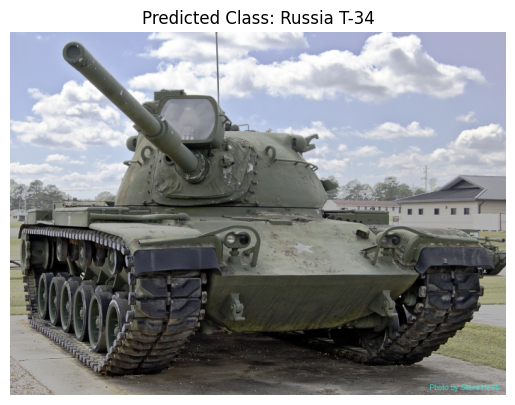

Predicted class: Russia T-34


In [88]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt
from IPython.display import display
import time

# Upload your image (Kaggle will show a file upload interface)
from google.colab import files  # only for Colab, not needed in Kaggle
# uploaded = files.upload()     # if you're on Colab, uncomment this

# For Kaggle, use this:
uploaded_file_path = '/kaggle/input/test-images/60.jpg'  # update this if needed

# Load and preprocess image
image = Image.open(uploaded_file_path).convert("RGB")

# Define the same transforms used in training/validation
transform = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

input_tensor = transform(image).unsqueeze(0).to(device)

# Run prediction
model.eval()
with torch.no_grad():
    start_time = time.time()
    outputs = model(input_tensor)
    end_time = time.time()
    predicted_idx = torch.argmax(outputs, dim=1).item()

# Calculate and print prediction time
elapsed_time = end_time - start_time
print(f"Prediction time: {elapsed_time:.4f} seconds")

# Show image and predicted class
plt.imshow(image)
plt.axis("off")
plt.title(f"Predicted Class: {class_names[predicted_idx]}")
plt.show()

print("Predicted class:", class_names[predicted_idx])

Leopard 2

Prediction time: 0.0176 seconds


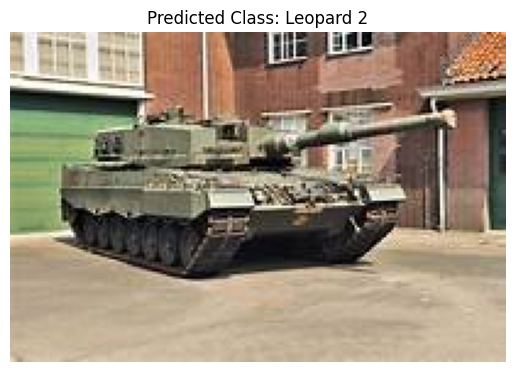

Predicted class: Leopard 2


In [89]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt
from IPython.display import display

# Upload your image (Kaggle will show a file upload interface)
from google.colab import files  # only for Colab, not needed in Kaggle
# uploaded = files.upload()     # if you're on Colab, uncomment this

# For Kaggle, use this:
uploaded_file_path = '/kaggle/input/test-images/Centurion.jpeg'  # update this if needed

# Load and preprocess image
image = Image.open(uploaded_file_path).convert("RGB")

# Define the same transforms used in training/validation
transform = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

input_tensor = transform(image).unsqueeze(0).to(device)

# Run prediction
model.eval()
with torch.no_grad():
    start_time = time.time()
    outputs = model(input_tensor)
    end_time = time.time()
    predicted_idx = torch.argmax(outputs, dim=1).item()

# Calculate and print prediction time
elapsed_time = end_time - start_time
print(f"Prediction time: {elapsed_time:.4f} seconds")

# Show image and predicted class
plt.imshow(image)
plt.axis("off")
plt.title(f"Predicted Class: {class_names[predicted_idx]}")
plt.show()

print("Predicted class:", class_names[predicted_idx])

Merkava IV

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt
from IPython.display import display

# Upload your image (Kaggle will show a file upload interface)
from google.colab import files  # only for Colab, not needed in Kaggle
# uploaded = files.upload()     # if you're on Colab, uncomment this

# For Kaggle, use this:
uploaded_file_path = '/kaggle/input/test-images/OIP.jpeg'  # update this if needed

# Load and preprocess image
image = Image.open(uploaded_file_path).convert("RGB")

# Define the same transforms used in training/validation
transform = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

input_tensor = transform(image).unsqueeze(0).to(device)

# Run prediction
model.eval()
with torch.no_grad():
    start_time = time.time()
    outputs = model(input_tensor)
    end_time = time.time()
    predicted_idx = torch.argmax(outputs, dim=1).item()

# Calculate and print prediction time
elapsed_time = end_time - start_time
print(f"Prediction time: {elapsed_time:.4f} seconds")

# Show image and predicted class
plt.imshow(image)
plt.axis("off")
plt.title(f"Predicted Class: {class_names[predicted_idx]}")
plt.show()

print("Predicted class:", class_names[predicted_idx])

T-34

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt
from IPython.display import display

# Upload your image (Kaggle will show a file upload interface)
from google.colab import files  # only for Colab, not needed in Kaggle
# uploaded = files.upload()     # if you're on Colab, uncomment this

# For Kaggle, use this:
uploaded_file_path = '/kaggle/input/test-images/T-34_2.jpg'  # update this if needed

# Load and preprocess image
image = Image.open(uploaded_file_path).convert("RGB")

# Define the same transforms used in training/validation
transform = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

input_tensor = transform(image).unsqueeze(0).to(device)

# Run prediction
model.eval()
with torch.no_grad():
    start_time = time.time()
    outputs = model(input_tensor)
    end_time = time.time()
    predicted_idx = torch.argmax(outputs, dim=1).item()

# Calculate and print prediction time
elapsed_time = end_time - start_time
print(f"Prediction time: {elapsed_time:.4f} seconds")

# Show image and predicted class
plt.imshow(image)
plt.axis("off")
plt.title(f"Predicted Class: {class_names[predicted_idx]}")
plt.show()

print("Predicted class:", class_names[predicted_idx])

Type99

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt
from IPython.display import display

# Upload your image (Kaggle will show a file upload interface)
from google.colab import files  # only for Colab, not needed in Kaggle
# uploaded = files.upload()     # if you're on Colab, uncomment this

# For Kaggle, use this:
uploaded_file_path = '/kaggle/input/test-images/Type99.jpeg'  # update this if needed

# Load and preprocess image
image = Image.open(uploaded_file_path).convert("RGB")

# Define the same transforms used in training/validation
transform = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

input_tensor = transform(image).unsqueeze(0).to(device)

# Run prediction
model.eval()
with torch.no_grad():
    start_time = time.time()
    outputs = model(input_tensor)
    end_time = time.time()
    predicted_idx = torch.argmax(outputs, dim=1).item()

# Calculate and print prediction time
elapsed_time = end_time - start_time
print(f"Prediction time: {elapsed_time:.4f} seconds")

# Show image and predicted class
plt.imshow(image)
plt.axis("off")
plt.title(f"Predicted Class: {class_names[predicted_idx]}")
plt.show()

print("Predicted class:", class_names[predicted_idx])

Magach

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt
from IPython.display import display

# Upload your image (Kaggle will show a file upload interface)
from google.colab import files  # only for Colab, not needed in Kaggle
# uploaded = files.upload()     # if you're on Colab, uncomment this

# For Kaggle, use this:
uploaded_file_path = '/kaggle/input/test-images/magash.jpg'  # update this if needed

# Load and preprocess image
image = Image.open(uploaded_file_path).convert("RGB")

# Define the same transforms used in training/validation
transform = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

input_tensor = transform(image).unsqueeze(0).to(device)

# Run prediction
model.eval()
with torch.no_grad():
    start_time = time.time()
    outputs = model(input_tensor)
    end_time = time.time()
    predicted_idx = torch.argmax(outputs, dim=1).item()

# Calculate and print prediction time
elapsed_time = end_time - start_time
print(f"Prediction time: {elapsed_time:.4f} seconds")

# Show image and predicted class
plt.imshow(image)
plt.axis("off")
plt.title(f"Predicted Class: {class_names[predicted_idx]}")
plt.show()

print("Predicted class:", class_names[predicted_idx])

All confidences: ['0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95']
Total prediction time for 10 runs: 0.1878 seconds
All predictions: ['Leopard 2', 'Leopard 2', 'Leopard 2', 'Leopard 2', 'Leopard 2', 'Leopard 2', 'Leopard 2', 'Leopard 2', 'Leopard 2', 'Leopard 2']
Final predicted class (by vote): Leopard 2


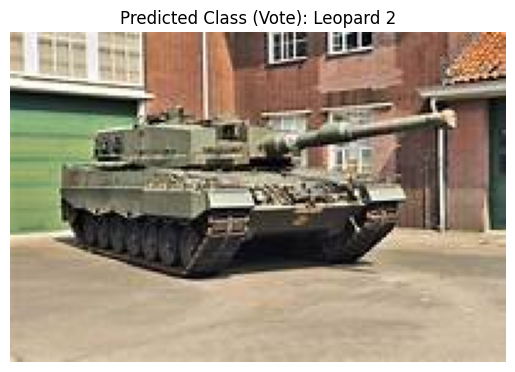

In [98]:
from collections import Counter
from PIL import Image
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.models import efficientnet_b3
import time
from collections import Counter
import torch.nn.functional as F
import numpy as np

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === STEP 1: Load original model, then replace classifier ===
model = torch.load(
    "/kaggle/working/efficeintNetv3_tanks_15epochs_0.0001lr_300size.pth",
    map_location=device,
    weights_only=False
)

model.to(device)
model.eval()

# === STEP 2: Load and preprocess image ===
uploaded_file_path = '/kaggle/input/test-images/Centurion.jpeg'
image = Image.open(uploaded_file_path).convert("RGB")

transform = transforms.Compose([
    transforms.Resize(300),
    transforms.CenterCrop(300),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

input_tensor = transform((image)).unsqueeze(0).to(device)

# Class names (example)
class_names = full_dataset.classes

# === STEP 3: Run prediction 10 times and vote ===
predictions = []
start_time = time.time()
confidences = []

with torch.no_grad():
    for _ in range(10):
        input_tensor = transform(image).unsqueeze(0).to(device)
        outputs = model(input_tensor)
        probs = F.softmax(outputs, dim=1)
        conf, pred = torch.max(probs, dim=1)
        predictions.append(pred.item())
        confidences.append(conf.item())

end_time = time.time()

vote_result = Counter(predictions).most_common(1)[0][0]

# === STEP 4: Show results ===
print(f"All confidences:", [f"{c:.2f}" for c in confidences])
print(f"Total prediction time for 10 runs: {end_time - start_time:.4f} seconds")
print(f"All predictions: {[class_names[idx] for idx in predictions]}")
print(f"Final predicted class (by vote): {class_names[vote_result]}")

plt.imshow(image)
plt.axis("off")
plt.title(f"Predicted Class (Vote): {class_names[vote_result]}")
plt.show()
